## 각각의 방법론들이, 가장 확률이 높은 slot을 어떻게 찾는가?

예를 들어, slot machine 이 5개 있고, 각각은 0 또는 1을 내뱉는다. 근데 완전 random은 아니고, 각각의 machine은 1을 내뱉을 확률이 정해져있다. 
예를 들어 
* slot1 은 75%의 확률로 1을 return
* slot2 는 50%의 확률로 1을 return
* slot3 는 90%의 확률로 1을 return
* slot4 는 10%의 확률로 1을 return
* slot5 는 20%의 확률로 1을 return

그러나 player는 slot3이 가장 1을 많이 내뱉는다는 사실을 알 수 없다. player가 어떤 slot이 좋은지를 아는 방법은, 오로지 empirical한 시도 후, 데이터에 근거해서 파악할 수 밖에 없다. 

그런데 이게 복불복인 것이, slot3이 90%의 확률로 1을 return 하기는 하지만, 어떤 시도 때는 slot5는 1을 return하고, slot3은 1을 return하지 않을 수도 있다. 따라서, 무엇을 선택할지 기준을 마련하려면, 어느정도 뽑아보고 나야지만 알 수 있다.  

### 선택기준 

다음은 특정(ex: 5번) slot을 선택할 확률이다. 
 $$ 지난번까지의 확률 + \frac{[이번에 맞췄는지 여부] - [지난번까지 확률]}{5번 \ \ slot \   \ 선택횟수}$$

#### 보수적인 사람은 이렇게 선택할 것이다. => 선택의 폭이 좁다.
* 시도 1 : [1,0,1,0,1]    
    * 5를 선택했는데, 맞췄음 
    * 머릿속 slot별 선호도 = [0, 0, 0, 0, 1] => 계속 5만 선택해야지
* 시도 2 : [1,0,0,0,1]
    * 5를 또 선택했는데, 또 맞춤 
    * 머릿속 slot별 선호도 = [0, 0, 0, 0, 1] => 진짜 5만 선택해야지. 
* 시도 3 : [1,1,0,1,0]
    * 이번에는 5선택했지만 틀림 
    * 5번 선호도 : $1 + \frac{0 -1}{3} = \frac{2}{3}$
    * 머릿속 선호도 = [0, 0, 0, 0, $\frac{2}{3}$]
    


#### 덜 보수적인 사람은 이렇게 선택한다. => 선택의 폭이 조금 넓다
* 시도 1: [1,0,1,0,1]
    * 5를 선택했는데 맞춤
    * 머릿속 slot별 선호도:[0,0,0,0,1] => 5가좋지만, 다른 것도 선택해야지
* 시도 2: [1,0,0,0,1]
    * 1을 선택했는데 맞춤 
    * 머릿속 slot별 선호도:[1,0,0,0,1] => 1도 잘맞고, 5도 잘맞는군
* 시도 3: [1,1,0,1,0] 
    * 5를 선택햇는데 틀림
    * 5번 선호도 : $1+\frac{0 - 1}{2} = \frac{1}{2}$
    * 머릿속 slot별 선호도: [1,0,0,0, $\frac{1}{2}$] => 다음엔 1을 선택해봐야지 
    

### 1. Epsilon Greedy 
* Exploitation 에 치중한다. 
* 매커니즘 
    *  np.random.random() < $\epsilon$ :    
     random action 
    *  np.random.random() > $\epsilon$ : 
    $$ argmax \ \ Q(a)$$
* $\epsilon$ 보통 작은 값이므로, 현 상태에서 최적의 값을 자주고른다.
    * => 정보가 많이 있는 것에 대해서만 선택하게 된다. 

### 2. Upper Confidence Bound (UCB)

* 최적화 식 
    $$ argmax\ \ {Q + \sqrt{\frac{\log{t}}{N(a)}}} $$

* 이 때, 전체횟수 t에 비해, 그 slot 시도한 횟수 $N(a)$ 가 적으면 (= explore이 덜 됐다면), 그 slot에  다른 slot에 비해 가중치를 주어, 그 slot을 explore하게 한다.

* 그러나 너무 많이 explore하게 되는 것을 방지하기 위해서, 전체 횟수에 log 텀을 씌움으로써, 상대적으로 적은 횟수만큼 explore되었다 하더라도 그 penalty term의 영향을 미미하게 한다. 

### 3. Bayesian ( Thompson Sampling)

$Q(1)$ 를 1번 slot이  1을 return할 확률이라면 
* 위 방법들 (frequentist 입장) :
    * slot별 prob : [$\frac{2}{3}$,0,1,0,0] 라면
    * $Q(1) = \frac{2}{3} $
* Bayesian 입장 
$$Q(1) = P(\theta_1 | D_1) = slot 1 \ \ 에 대한 \ \ 데이터가 \ \ 주어졌을 때, slot1확률 $$     
$$P(\theta_1 | D_1) = \frac{P(D_1 | \theta_1) \times P(\theta_1)}{P(D_1)}$$    
$$ \varpropto Bernouli(\theta_1) \times Beta(\alpha, \ \ \beta)$$    
$$  = \theta_1^{hit}(1-\theta_1)^{not} \times \frac{\Gamma{(\alpha + \beta)}}{\Gamma{(\alpha)}\Gamma{(\beta)}} \theta_1^{\alpha} (1-\theta_1)^{\beta} $$    
$$Q(1) \varpropto Beta  \ \ (\alpha+hit \ \ , \ \ \beta+not)$$



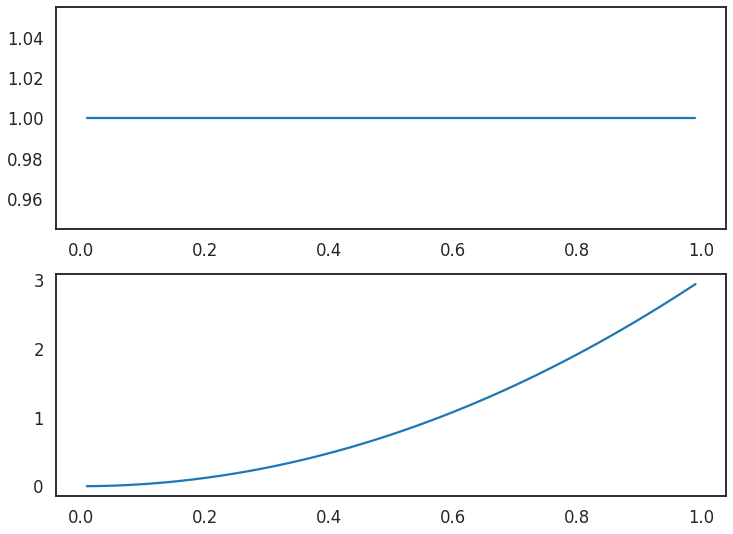

In [66]:
from scipy.stats import beta, gamma
from numpy import linspace, exp

x = linspace(0.01, 0.99, 99)
plt.figure(figsize = (12, 9))
plt.subplot(2, 1, 1)
plt.plot(x,beta(1,1).pdf(x))
plt.subplot(2, 1, 2)
plt.plot(x, beta(3,1).pdf(x))

## Bandit 에 대한 setting

In [56]:
import numpy as np
import pymc3 as pm


class MultiArmedBandit(object):
    """
    A Multi-armed Bandit
    """
    def __init__(self, k):
        self.k = k
        self.action_values = np.zeros(k)
        self.optimal = 0

    def reset(self):
        self.action_values = np.zeros(self.k)
        self.optimal = 0

    def pull(self, action):
        return 0, True
    
    

class BinomialBandit(MultiArmedBandit):
  
    """
    전체 N번 을 던져서, K번 reward를 받는다.(이 때 reward를 받을 확률은 p) 
    이 때 K ~ Binomial(N,p) 로 표현한다. 
    
    """
    def __init__(self, k, n, p=None, t=None):
        super(BinomialBandit, self).__init__(k)
        
        ## p 는 k개의 bandit의 각각의 확률이 담긴 list
        ## bandit이 benrnouli 분포이므로, n =1 이라고 가정한다.
        self.n = n
        self.p = p
        self.t = t
        ## 모델 객체저장.
        self.model = pm.Model()
        
        ## 각각의 bandit마다 binomial setting 한다. (k=bandit 갯수)
        ## 각각의 bandit의 전체 분모는 결국 총 횟수 n이므로, 다 같고, 확률또한 일단 같게 setting
        with self.model:
            self.bin = pm.Binomial('binomial', n=n*np.ones(k, dtype=np.int),
                                   p=np.ones(k)/n, shape=(1, k), transform=None)
        self._samples = None
        self._cursor = 0
        
        self.reset()

    ## bandit을 reset하는 경우 
    # 1. bandit 이 베르누이인데, 각 bandit마다 확률이 안정해져있으면, 생성.
    # 2. 가장 optimal한 bandit 설정(정답지 생성 -> 베르누이 확률기반)
    def reset(self):
        if self.p is None:
            ## action value는 확률값. (각각의 k개의 bandit에 대한)  
            self.action_values = np.random.uniform(size=self.k)
        else:
            self.action_values = self.p
        
        ## 각각의 bandit은 확률변수임. 즉 확률분포를 따르는 어떤 수를 내뱉는다. 
        ## 따라서, 각각의 bandit의 확률분포의 모수를 부여한다. 
        self.bin.distribution.p = self.action_values
        
        
        if self.t is not None:
            self._samples = self.bin.random(size=self.t).squeeze()
            self._cursor = 0

        self.optimal = np.argmax(self.action_values)

    ## 잡아당기는 행위 : 몇번 bandit을 선택할꺼냐.
    ## reward : 맞췄는지, 못맞췄는지 
    ## optimal : 가장 좋은 bandit을 선택했었는가??  
    def pull(self, action):
        ttemp = self.sample
        print("sample" ,ttemp)
        return ttemp[action], action == self.optimal

    ## 10개의 bandit에 대한 값이다. 
    ## 3000row 개가 있다. 여기서 각각을 뽑아낸다. cursor 가 계속 증가하면서, 해당 try번째의 row를 (10개 bandit 결과) 를 가져온다.
    @property
    def sample(self):
        if self._samples is None:
            return self.bin.random()
        else:
            val = self._samples[self._cursor]
            self._cursor += 1
            return val

class BernoulliBandit(BinomialBandit):
    """
   베르누이 bandit 은 binomial에서 전체 시행횟수가 1로 고정되어 있는 경우이므로, 
   그냥 Binomial bandit 에다가 k = 1 인 경우로 하겠다. 
    """
    def __init__(self, k, p=None, t=None):
        super(BernoulliBandit, self).__init__(k, 1, p=p, t=t)

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

class Agent(object):
    """
    An Agent is able to take one of a set of actions at each time step. The
    action is chosen using a strategy based on the history of prior actions
    and outcome observations.
    """
    def __init__(self, bandit, policy, prior=0, gamma=None):
        self.policy = policy
        self.k = bandit.k
        self.prior = prior
        self.gamma = gamma
        self._value_estimates = prior*np.ones(self.k)
        self.action_attempts = np.zeros(self.k)
        self.t = 0
        self.last_action = None

    def __str__(self):
        return 'f/{}'.format(str(self.policy))

    def reset(self):
        """
        Resets the agent's memory to an initial state.
        """
        self._value_estimates[:] = self.prior
        self.action_attempts[:] = 0
        self.last_action = None
        self.t = 0

    ## 레버를 당기는데, 당기는 기준이 policy로 정해져있다. 당기고난 action은 기억을 위해서, 그 agent의 마지막 행위로 저장한다.    
    def choose(self):
        action = self.policy.choose(self)
        self.last_action = action
        return action

    def observe(self, reward):
        self.action_attempts[self.last_action] += 1

        if self.gamma is None:
            g = 1 / self.action_attempts[self.last_action]
        else:
            g = self.gamma
        q = self._value_estimates[self.last_action]

        self._value_estimates[self.last_action] += g*(reward - q)
        print("value_estimates")
        print(self._value_estimates)
        self.t += 1

    @property
    def value_estimates(self):
        return self._value_estimates
    

class BetaAgent(Agent):
    """
    모수가 beta분포를 따른다고 가정한다. 미지의 분포에 대해서 beta분포라고 추정한다.
    왜냐하면, 지금 데이터가 보이는 분포는 binomial, 혹은 bernouli인데, 이 분포들에 대해 
    beta 분포가 conjugate하기 때문이다. 
    """
    
    def __init__(self, bandit, policy, ts=True):
        super(BetaAgent, self).__init__(bandit, policy)
        self.n = bandit.n
        self.ts = ts
        self.model = pm.Model()
        with self.model:
            self._prior = pm.Beta('prior', alpha=np.ones(self.k),
                                  beta=np.ones(self.k), shape= self.k,
                                  transform=None)
        self._value_estimates = np.zeros(self.k)

    def __str__(self):
        if self.ts:
            return 'b/ThompSon'
        else:
            return 'b/{}'.format(str(self.policy))

    def reset(self):
        super(BetaAgent, self).reset()
        self._prior.distribution.alpha = np.ones(self.k)
        self._prior.distribution.beta = np.ones(self.k)


    def observe(self, reward):
        ## 가장 최근에 pull한 레버의 선택 수 +1
        self.action_attempts[self.last_action] += 1

        ## 선택이 되었으니까 올려준다. 
        self.alpha[self.last_action] += reward
        
        ## 선택 안됐으면 안올려준다는 의미 ( self.n은 그냥 1이다) 
        self.beta[self.last_action] += self.n - reward

        if self.ts:
            self._value_estimates = self._prior.random()
        else:
            self._value_estimates = self.alpha / (self.alpha + self.beta)
        self.t += 1

    @property
    def alpha(self):
        return self._prior.distribution.alpha

    @property
    def beta(self):
        return self._prior.distribution.beta

In [58]:
class Environment(object):
    def __init__(self, bandit, agents, label='Multi-Armed Bandit'):
        self.bandit = bandit
        self.agents = agents
        self.label = label

    # 모든 agent들 초기화     
    def reset(self):
        self.bandit.reset()
        for agent in self.agents:
            agent.reset()

    def run(self, trials=100, experiments=1):
        ##각 trial 마다 agents들이 얻은 점수표 (1000 * 3) 
        scores = np.zeros((trials, len(self.agents)))
        
        ## optimal했던 선택?들을 저장하기 위한 array(각 시도때마다, agent들 선택)
        optimal = np.zeros_like(scores)

        for _ in range(experiments):
            ## bandit을 reset한다. => (optimal한 정답지바꾼다.각 bandit마다의 확률바꾼다.)
            self.reset()
            for t in range(trials):
                for i, agent in enumerate(self.agents):
                    ## agent들 각각 중에서 어느 레버를 당길지 선택한다.
                    # 이 때 당기는 action은 각 agent의 판단에 맡긴다. 
                    action = agent.choose()
                    reward, is_optimal = self.bandit.pull(action)
                    print(agent.policy)
                    print("action", action," reward:",reward, " is_optimal:",is_optimal)
                    agent.observe(reward)

                    scores[t, i] += reward
                    if is_optimal:
                        optimal[t, i] += 1

        return scores / experiments, optimal / experiments

    def plot_results(self, scores, optimal):
        sns.set_style('white')
        sns.set_context('talk')
        plt.figure(figsize=(30,40))
        plt.subplot(2, 1, 1)
        plt.title(self.label)
        plt.plot(scores)
        plt.ylabel('Average Reward')
        plt.legend(self.agents, loc=4)
        plt.subplot(2, 1, 2)
        plt.plot(optimal * 100)
        plt.ylim(0, 100)
        plt.ylabel('% Optimal Action')
        plt.xlabel('Time Step')
        plt.legend(self.agents, loc=4)
        sns.despine()
        plt.show()

    def plot_beliefs(self):
        sns.set_context('talk')
        pal = sns.color_palette("cubehelix", n_colors=len(self.agents))
        plt.title(self.label + ' - Agent Beliefs')

        rows = 2
        cols = int(self.bandit.k / 2)

        axes = [plt.subplot(rows, cols, i+1) for i in range(self.bandit.k)]
        for i, val in enumerate(self.bandit.action_values):
            color = 'r' if i == self.bandit.optimal else 'k'
            axes[i].vlines(val, 0, 1, colors=color)

        for i, agent in enumerate(self.agents):
            if type(agent) is not BetaAgent:
                for j, val in enumerate(agent.value_estimates):
                    axes[j].vlines(val, 0, 0.75, colors=pal[i], alpha=0.8)
            else:
                x = np.arange(0, 1, 0.001)
                y = np.array([stats.beta.pdf(x, a, b) for a, b in
                             zip(agent.alpha, agent.beta)])
                y /= np.max(y)
                for j, _y in enumerate(y):
                    axes[j].plot(x, _y, color=pal[i], alpha=0.8)

        min_p = np.argmin(self.bandit.action_values)
        for i, ax in enumerate(axes):
            ax.set_xlim(0, 1)
            if i % cols != 0:
                ax.set_yticklabels([])
            if i < cols:
                ax.set_xticklabels([])
            else:
                ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
                ax.set_xticklabels(['0', '', '0.5', '', '1'])
            if i == int(cols/2):
                title = '{}-arm Bandit - Agent Estimators'.format(self.bandit.k)
                ax.set_title(title)
            if i == min_p:
                ax.legend(self.agents)

        sns.despine()
        plt.show()

In [59]:
class Policy(object):
    """
    A policy prescribes an action to be taken based on the memory of an agent.
    """
    def __str__(self):
        return 'generic policy'

    def choose(self, agent):
        return 0


class EpsilonGreedyPolicy(Policy):
    """
    The Epsilon-Greedy policy will choose a random action with probability
    epsilon and take the best apparent approach with probability 1-epsilon. If
    multiple actions are tied for best choice, then a random action from that
    subset is selected.
    """
    def __init__(self, epsilon):
        self.epsilon = epsilon

    def __str__(self):
        return '\u03B5-greedy (\u03B5={})'.format(self.epsilon)

    def choose(self, agent):
        randomNumber = np.random.random()
        if randomNumber < self.epsilon:
            # value_estimate이 각각의 bandit 대한 정보를 가지고 있으므로... 
            # bandit 갯수 중에서 아무거나 한 개 고른다. 
            return np.random.choice(len(agent.value_estimates))
        else:
            ## 가장 나은 것을 고르자. (지금까지 알고 있던 것 중에서) 
            action = np.argmax(agent.value_estimates)
            check = np.where(agent.value_estimates == agent.value_estimates[action])[0]
            if len(check) == 1:
                return action
            else:
                return np.random.choice(check)
            
class UCBPolicy(Policy):
    """
    The Upper Confidence Bound algorithm (UCB1). It applies an exploration
    factor to the expected value of each arm which can influence a greedy
    selection strategy to more intelligently explore less confident options.
    """
    def __init__(self, c):
        self.c = c

    def __str__(self):
        return 'UCB (c={})'.format(self.c)

    def choose(self, agent):
        exploration = np.log(agent.t+1) / agent.action_attempts
        exploration[np.isnan(exploration)] = 0
        exploration = np.power(exploration, 1/self.c)

        q = agent.value_estimates + exploration
        action = np.argmax(q)
        check = np.where(q == q[action])[0]
        if len(check) == 1:
            return action
        else:
            return np.random.choice(check)     
        
class GreedyPolicy(EpsilonGreedyPolicy):
    """
    The Greedy policy only takes the best apparent action, with ties broken by
    random selection. This can be seen as a special case of EpsilonGreedy where
    epsilon = 0 i.e. always exploit.
    """
    def __init__(self):
        super(GreedyPolicy, self).__init__(0)

    def __str__(self):
        return 'greedy'        

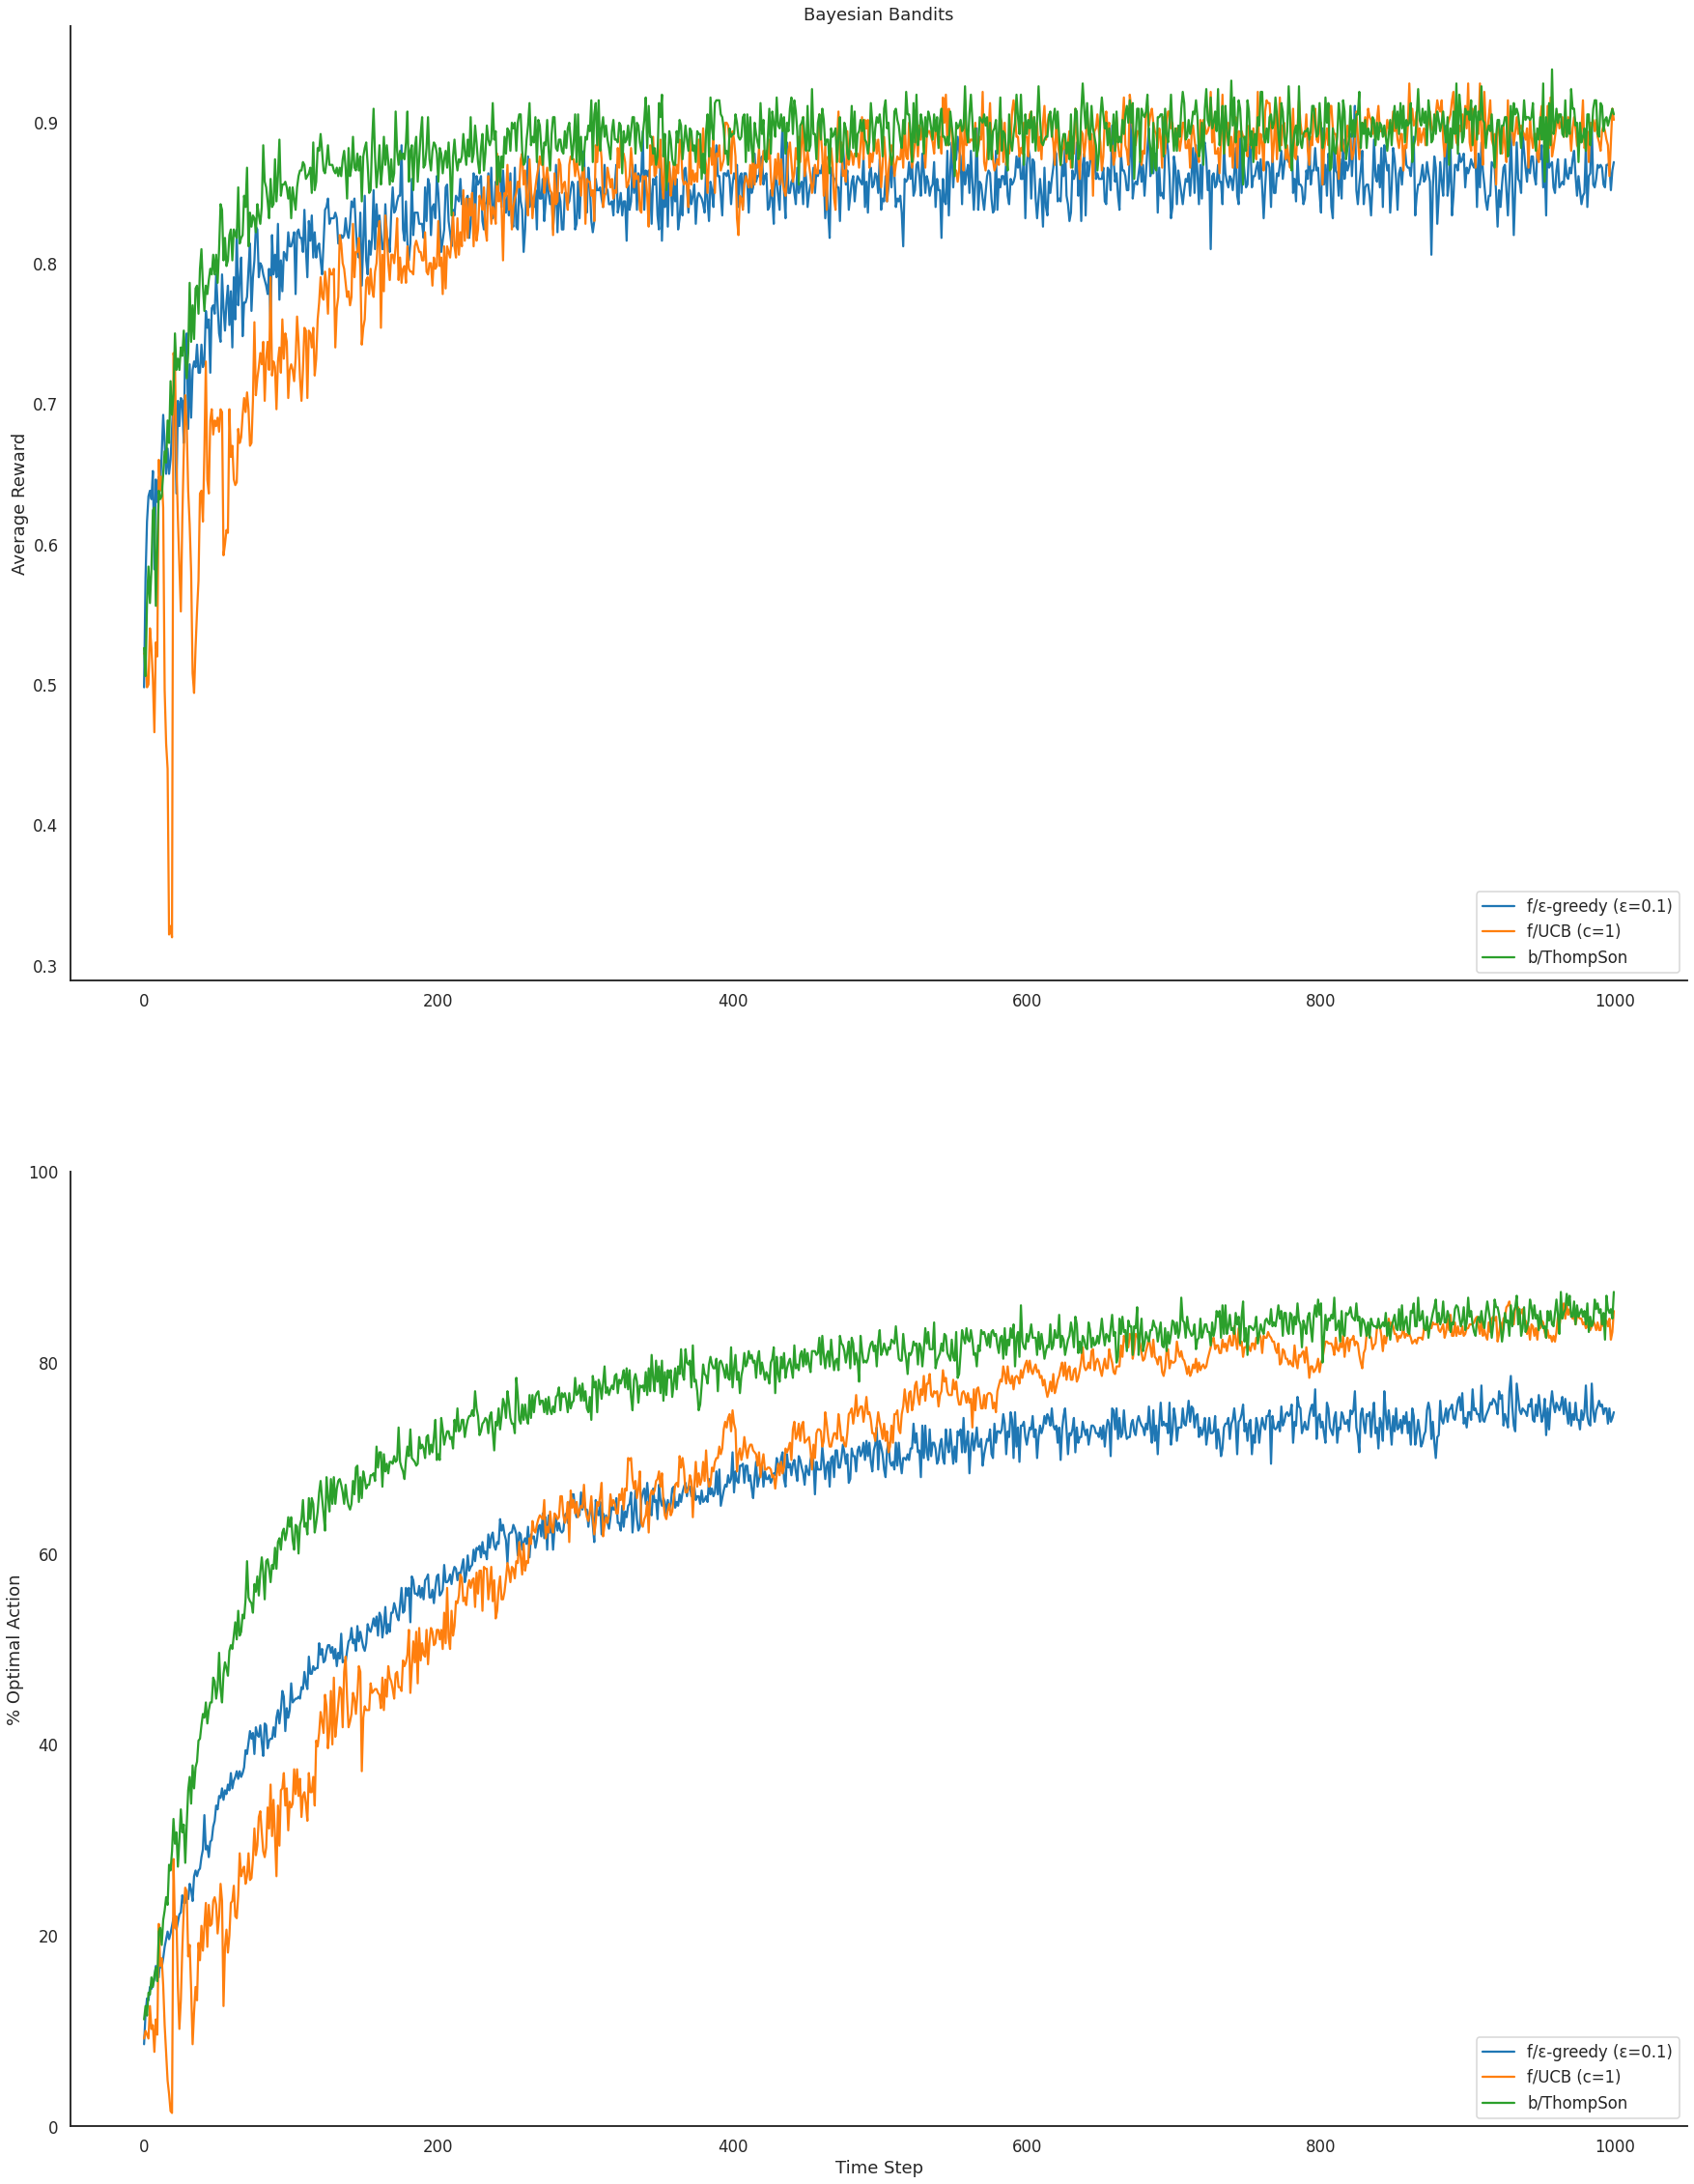

In [45]:

%matplotlib inline
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
n_arms = 10
n_trials = 1000
n_experiments = 500
bandit = BernoulliBandit(n_arms, t=3*n_trials)  # cache samples ahead of time for speed


agents = [
    Agent(bandit, EpsilonGreedyPolicy(0.1)),
    Agent(bandit, UCBPolicy(1)),
    BetaAgent(bandit, GreedyPolicy())
]
env = Environment(bandit, agents, label='Bayesian Bandits')
scores, optimal = env.run(n_trials, n_experiments)
env.plot_results(scores, optimal)